# K-Means Clustering

Clustering is a type of Unsupervised learning. This is very often used when you don’t have labeled data. K-Means Cl4ustering is one of the popular clustering algorithm. The goal of this algorithm is to find groups(clusters) in the given data. 

K-Means is a very simple algorithm which clusters the data into K number of clusters. The following image from PyPR is an example of K-Means Clustering.

<img src="https://i.imgur.com/S65Sk9c.jpg">

# Use Cases

K-Means is widely used for many applications.

1.Image Segmentation

2.Clustering Gene Segementation Data

3.News Article Clustering

4.Clustering Languages

5.Species Clustering

6.Anomaly Detection

# Algorithm

Our algorithm works as follows, assuming we have inputs 
x
1
,
x
2
,
x
3
,
…
,
x
n
 and value of K

<img src="https://i.imgur.com/k4XcapI.gif">
The above animation is an example of running K-Means Clustering on a two dimensional data.

<img src="img/1.png">

<img src="img/2.png">

We run the algorithm for different values of K(say K = 10 to 1) and plot the K values against SSE(Sum of Squared Errors). And select the value of K for the elbow point as shown in the figure.

# Implementation using Python

The dataset we are gonna use has 3000 entries with 3 clusters. So we already know the value of K.

In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
# Importing the dataset
data = pd.read_csv('xclara.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


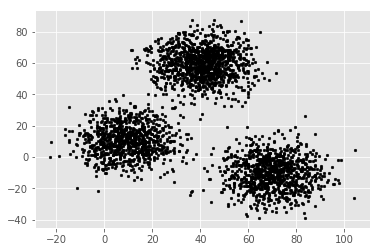

In [3]:
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [4]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [5]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[ 8. 63.]
 [66. 22.]
 [ 4. 65.]]


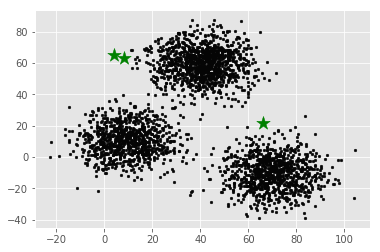

In [6]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [7]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

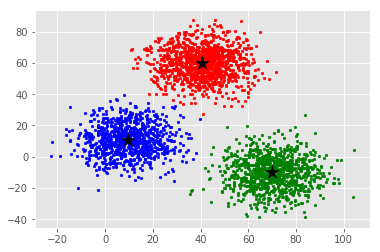

In [8]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

From this visualization it is clear that there are 3 clusters with black stars as their centroid.

If you run K-Means with wrong values of K, you will get completely misleading clusters. For example, if you run K-Means on this with values 2, 4, 5 and 6, you will get the following clusters.

# The scikit-learn approach

# Example 1

We will use the same dataset in this example.

In [9]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

In [10]:
# Comparing with scikit-learn centroids
print(C) # From Scratch
print(centroids) # From sci-kit learn

[[ 40.683628  59.715893]
 [ 69.92419  -10.119641]
 [  9.478045  10.686052]]
[[ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]]


# Example 2

We will generate a new dataset using make_blobs function.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)


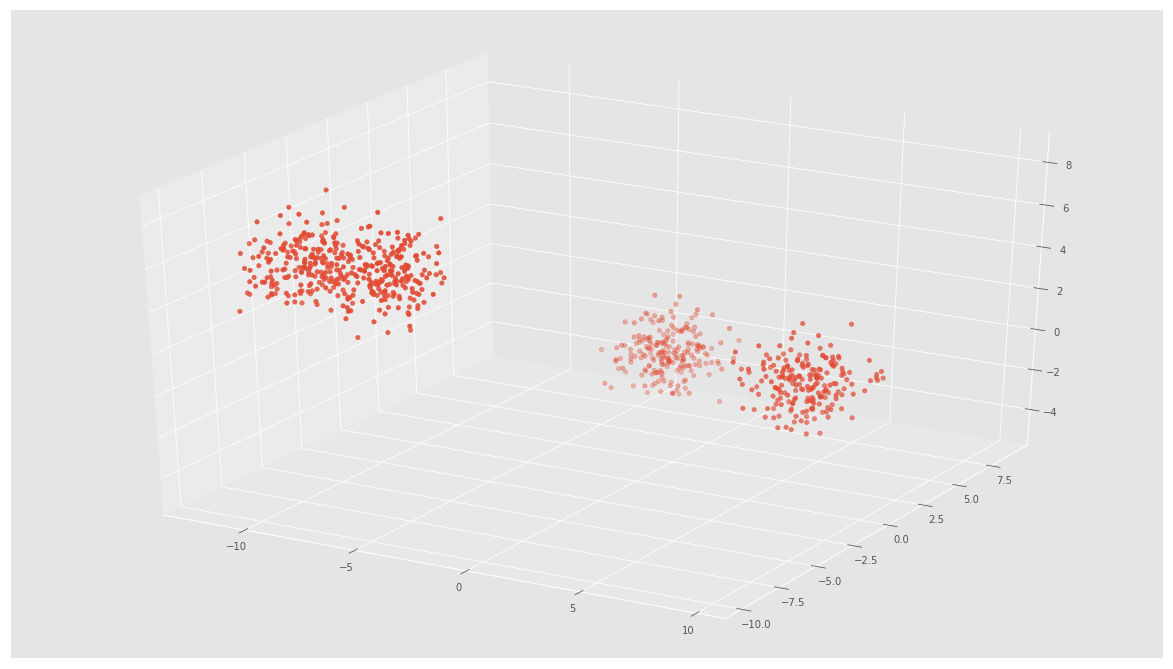

In [13]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])


In [14]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

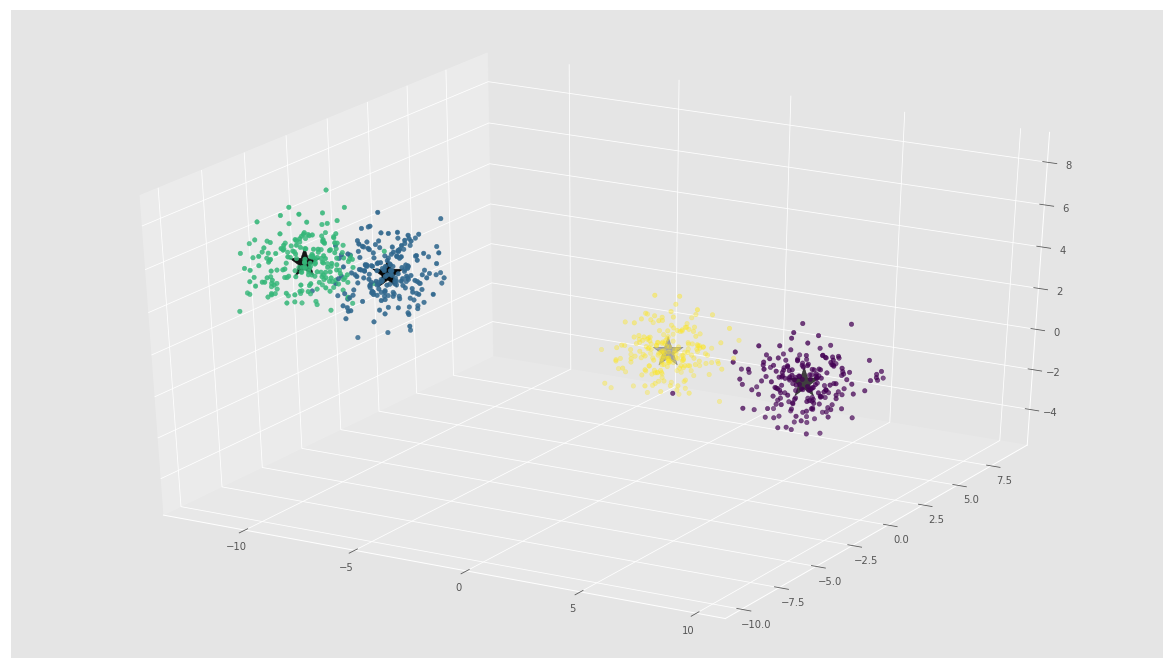

In [15]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

# Conclusion

Even though it works very well, K-Means clustering has its own issues. That include:

1.If you run K-means on uniform data, you will get clusters.


2.Sensitive to scale due to its reliance on Euclidean distance.

3.Even on perfect data sets, it can get stuck in a local minimum

Source :https://mubaris.com/2017/10/01/kmeans-clustering-in-python/